In [3]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the data
print(customers.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
# Aggregate transaction data for each customer
customer_spending = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count'  # Number of transactions
}).rename(columns={'TotalValue': 'TotalSpending', 'TransactionID': 'TransactionCount'})

# Merge with customer profiles
customer_profile = pd.merge(customers, customer_spending, on='CustomerID', how='left')

# Fill missing values for customers with no transactions
customer_profile['TotalSpending'] = customer_profile['TotalSpending'].fillna(0)
customer_profile['TransactionCount'] = customer_profile['TransactionCount'].fillna(0)

print(customer_profile.head())


  CustomerID        CustomerName         Region  SignupDate  TotalSpending  \
0      C0001    Lawrence Carroll  South America  2022-07-10        3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13        1862.74   
2      C0003      Michael Rivera  South America  2024-03-07        2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09        5354.88   
4      C0005         Laura Weber           Asia  2022-08-15        2034.24   

   TransactionCount  
0               5.0  
1               4.0  
2               4.0  
3               8.0  
4               3.0  


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Region' column
encoder = LabelEncoder()
customer_profile['RegionEncoded'] = encoder.fit_transform(customer_profile['Region'])

# Check the result
print(customer_profile[['Region', 'RegionEncoded']].head())


          Region  RegionEncoded
0  South America              3
1           Asia              0
2  South America              3
3  South America              3
4           Asia              0


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical variables (e.g., Region)
encoder = LabelEncoder()
customer_profile['RegionEncoded'] = encoder.fit_transform(customer_profile['Region'])

# Select features for clustering
features = ['TotalSpending', 'TransactionCount', 'RegionEncoded']

# Normalize numeric features
scaler = MinMaxScaler()
customer_profile[features[:2]] = scaler.fit_transform(customer_profile[features[:2]])

# Clustering data
clustering_data = customer_profile[features]
print(clustering_data.head())


   TotalSpending  TransactionCount  RegionEncoded
0       0.314274          0.454545              3
1       0.174514          0.363636              0
2       0.255332          0.363636              3
3       0.501681          0.727273              3
4       0.190581          0.272727              0


In [8]:
from sklearn.cluster import KMeans

# Define the number of clusters (try values between 2 and 10)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(clustering_data)

print(customer_profile[['CustomerID', 'Cluster']].head())


  CustomerID  Cluster
0      C0001        1
1      C0002        3
2      C0003        1
3      C0004        1
4      C0005        3


In [9]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(clustering_data, customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.44778022710090537


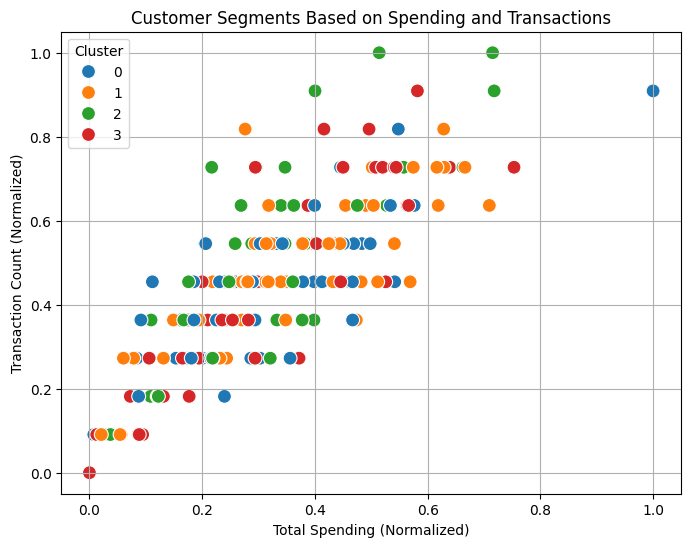

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of TotalSpending vs TransactionCount
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customer_profile,
    x='TotalSpending',
    y='TransactionCount',
    hue='Cluster',
    palette='tab10',
    s=100
)
plt.title('Customer Segments Based on Spending and Transactions')
plt.xlabel('Total Spending (Normalized)')
plt.ylabel('Transaction Count (Normalized)')
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [11]:
customer_profile[['CustomerID', 'Cluster']].to_csv('Swapnil_More_Clustering.csv', index=False)


In [12]:
# Count the number of customers in each cluster
cluster_sizes = customer_profile['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)


Cluster Sizes:
 Cluster
1    59
0    50
2    46
3    45
Name: count, dtype: int64


In [13]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(clustering_data, customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.44778022710090537


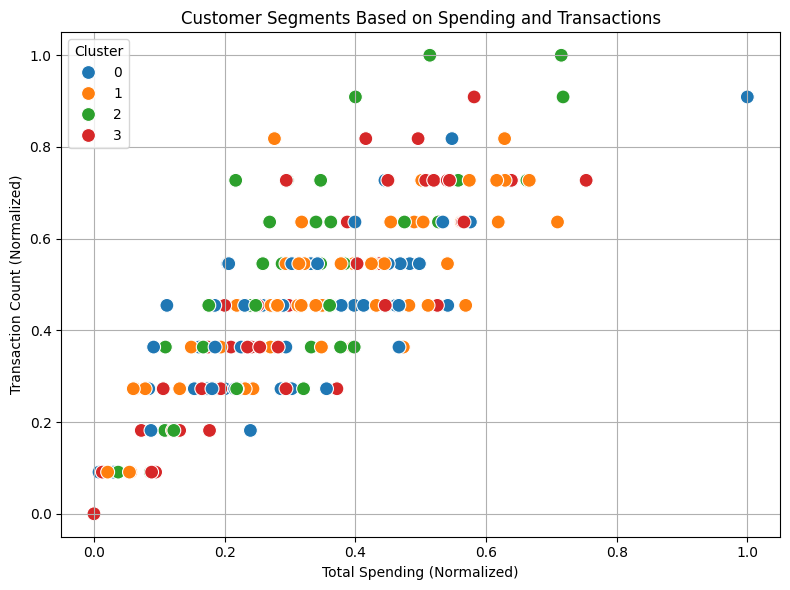

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of TotalSpending vs TransactionCount
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customer_profile,
    x='TotalSpending',
    y='TransactionCount',
    hue='Cluster',
    palette='tab10',
    s=100
)
plt.title('Customer Segments Based on Spending and Transactions')
plt.xlabel('Total Spending (Normalized)')
plt.ylabel('Transaction Count (Normalized)')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.savefig('cluster_scatter_plot.png')  # Save for the report
plt.show()


/var/folders/vq/qcmg6lt57zz3k_p8p2xpmsn00000gn/T/ipykernel_65631/3362576467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')


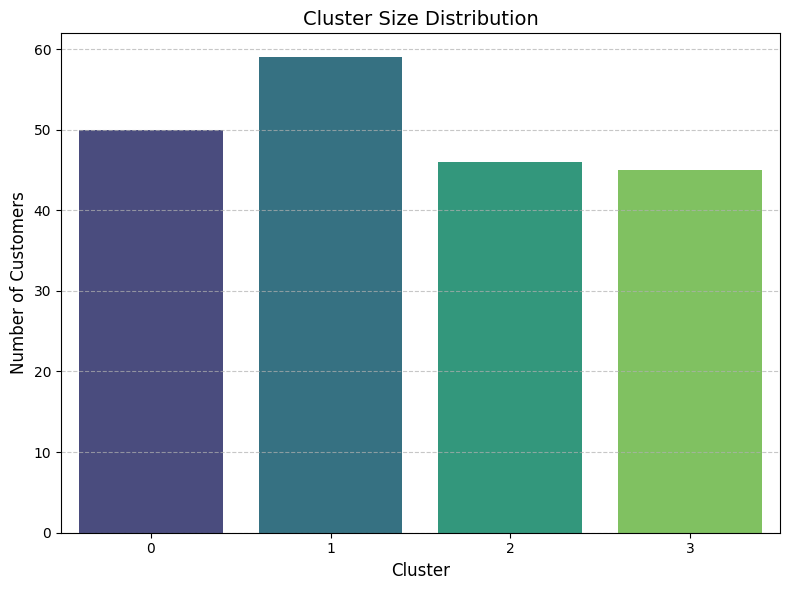

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each cluster
cluster_sizes = customer_profile['Cluster'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Size Distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('cluster_size_distribution.png')  # Save as PNG for your report
plt.show()
